In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # for ploting 3d functions

print("packages imported")

packages imported


In [3]:
# load data
cust_data = pd.read_csv("customer_data_2025.csv")
cust = pd.DataFrame(cust_data)
weather_data = pd.read_csv("weatherstats_vancouver_daily_2025.csv")
weather = pd.DataFrame(weather_data)

# Start

First some eda on both things

In [8]:
# Eda
print(cust.describe())
print("----------------------------------------------")

            Hour  January_Frequency_Customers_Alumni_Centre  \
count  12.000000                                  12.000000   
mean   12.500000                                 506.750000   
std     3.605551                                 258.977754   
min     7.000000                                  87.000000   
25%     9.750000                                 337.750000   
50%    12.500000                                 578.500000   
75%    15.250000                                 716.750000   
max    18.000000                                 815.000000   

       January_Frequency_Customers_Sauder  \
count                           12.000000   
mean                           398.416667   
std                            224.501654   
min                              0.000000   
25%                            272.500000   
50%                            463.000000   
75%                            599.250000   
max                            662.000000   

       July_Frequency_Cust

In [9]:
print(weather.describe())

               Year         Month           Day  temperature      humidity  \
count  10227.000000  10227.000000  10227.000000  10227.00000  10227.000000   
mean    2010.501027      6.522930     15.729637     10.60254     78.104821   
std        8.078184      3.448872      8.800522      5.84021      9.464733   
min     1997.000000      1.000000      1.000000    -11.55000     25.000000   
25%     2004.000000      4.000000      8.000000      6.15000     72.000000   
50%     2011.000000      7.000000     16.000000     10.19000     78.500000   
75%     2017.500000     10.000000     23.000000     15.65000     85.000000   
max     2024.000000     12.000000     31.000000     28.40000    100.000000   

       precipitation  
count   10227.000000  
mean        3.193889  
std         6.473059  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         3.600000  
max        91.600000  


# Implementation of the cost function thing
$$
C(T, P) = max\{c(T, P), 0\} 
$$
$$
c(T, P) = C_{0} + a(T − T_{0})^2 − b(P − P_{0}) − c(H − H_{0})^2, 
$$
where:  
-  the total daily customers is C, 
- the average daily temperature is T,  (can get from data.csv)
- the average daily hummidity is H, (can get from data.csv)
- the total daily precipitation is P, (can get from data.csv)
- the reference number of customers is C0, 
- the reference temperature is T0, 
- the reference precipitation is P0, 
- the reference Humidity is H0, 
- the rate of change of customers with respect to (square) temperature is a. 
- the rate of change of customers with respect to precipitation is b.
- the rate of change of customers with respect to (square) humidity is c.


NOTE I think she defintly meant to include the custormer function to be:
$$
c(T,P,H)
$$

In [19]:
# random intial run through with some mean values for the "x0"s and 1 for params
a,b,c,c0,t0,p0,h0 = [1,1,1,500,10,3,78]
def cFunc(TempDay,PrecipatationDay,HumidatyDay):
    return c0+a*(TempDay-t0)**2-b*(PrecipatationDay-p0)-c*(HumidatyDay-h0)**2

sampleDay = cFunc(20,0,50)
C = np.max(sampleDay,0)
print(f"Number of custormers is = {C}")

Number of custormers is = -181


# Build solutions
1. Need to make a menu array(of prices) that custormers sample from randomly when purchasing. Can get the prices from loafe data and maybe we make some assumitions on how a custormer samples from the menu(average purchase with some variance? long tail maybe because you have family's or groups of people sometimes paying all together).
- I think we make a new random varible $X$ which repersents how much money \$ a custormer spends when at loafe.
  
2. Each day revunune will be = $C(T,P,H) \cdot X$, for some given $T,P,H$ values of that day.

3. Total year revune will be $\sum_{i=0}^{364}C(T_i,P_i,H_i) \cdot X$

4. I think also we should do what Erics idea was of making PDF's for each $T_i,P_i,H_i$ (where $i \in [0,364]$) well do this with KDES. So to produce day 1 revune we produce one random sample from the distrubution of $T_1,P_1,H_1$.

5. This means we will have $365 \cdot 3$ KDE's to make so this might get a little computation expensive.

6. We can extract each days data into its own smaller data frame with some like $T_1$ = all rows with column index $\equiv 1 \pmod{27}$ or whatever we need here.(index from 1 or 0? not sure)
 

In [43]:
print(weather.head())

   Year  Month  Day  temperature  humidity  precipitation
0  2024     12   31         4.95      91.0            1.4
1  2024     12   30         4.25      99.0           10.7
2  2024     12   29         5.09      96.5            8.1
3  2024     12   28         8.55      87.5            7.1
4  2024     12   27         6.75      90.5            5.0


# random stuff that doesnt really work

-391213.2184994152


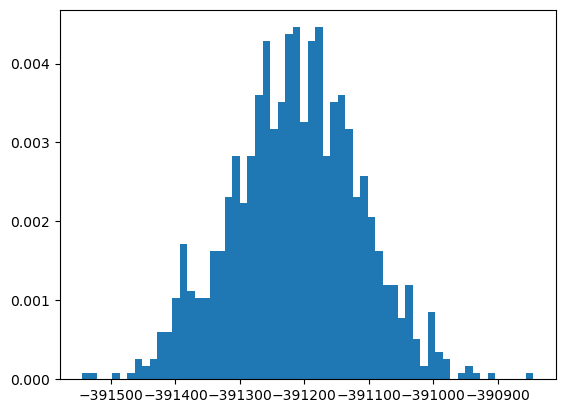

In [42]:
### Monte carlos 
# add noise to just a, a = 10 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    a = a0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()


661.3124519579878


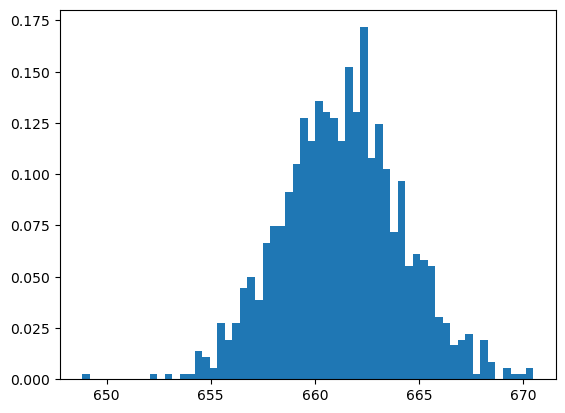

In [35]:
### Monte carlos 
# add noise to just b, a = 10 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    b = b0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()

-390557.97541208466


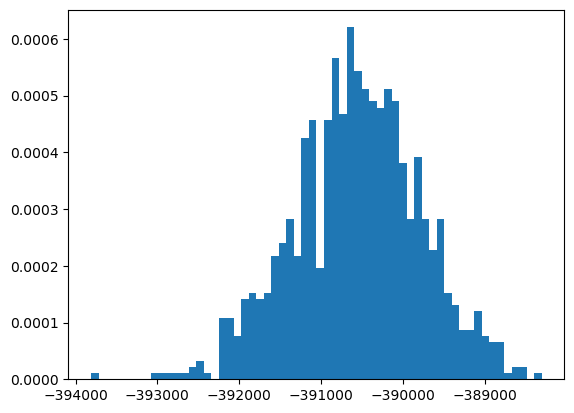

In [39]:
### Monte carlos 
# add noise to just c, c = 1 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    c = c0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()